In [41]:
import numpy as np
import matplotlib.pyplot as plt
import os
from astropy.io import fits
import h5py
%matplotlib inline

In [16]:
lya_mock_path = "/project/projectdirs/desi/mocks/lya_forest/develop/london/v6.0/v6.0.0"
pix_num = 11
sub_pix = 1100
data_path = os.path.join(lya_mock_path, str(pix_num), str(sub_pix))
print(data_path)
filename = "transmission-16-{}.fits".format(sub_pix)
mock_filename = os.path.join(data_path, filename)
print(mock_filename)

/project/projectdirs/desi/mocks/lya_forest/develop/london/v6.0/v6.0.0/11/1100
/project/projectdirs/desi/mocks/lya_forest/develop/london/v6.0/v6.0.0/11/1100/transmission-16-1100.fits


In [18]:
hdul = fits.open(mock_filename)
hdul.info()
tmp_transmission_data = hdul[3].data
wave = hdul[2].data
meta_data = hdul[1].data
n_spectra = len(tmp_transmission_data)
n_lambda = np.shape(tmp_transmission_data)[1]
print(n_spectra, n_lambda)
print(np.shape(tmp_transmission_data))
hdul.close()

Filename: /project/projectdirs/desi/mocks/lya_forest/develop/london/v6.0/v6.0.0/11/1100/transmission-16-1100.fits
No.    Name      Ver    Type      Cards   Dimensions   Format
  0  PRIMARY       1 PrimaryHDU       4   ()      
  1  METADATA      1 BinTableHDU     24   1201R x 5C   [E, E, E, E, K]   
  2  WAVELENGTH    1 ImageHDU        12   (14750,)   float32   
  3  TRANSMISSION    1 ImageHDU        13   (14750, 1201)   float32   
  4  DLA           1 BinTableHDU     24   199R x 5C   [E, E, E, K, K]   
1201 14750
(1201, 14750)


In [19]:
meta_data

FITS_rec([( 21.40334702, -8.31452942,  2.71009254,  2.70586443, 40153346),
          ( 23.29009056, -8.80938911,  2.4070015 ,  2.40902901, 40153353),
          ( 22.21858406, -8.39106178,  2.65800166,  2.65722013, 40153354),
          ...,
          ( 23.28204727, -8.84833717,  2.40570903,  2.40722632, 40248895),
          ( 21.90701294, -7.73597956,  3.18695188,  3.18976212, 40248914),
          ( 24.4144249 , -7.92385101,  3.0219357 ,  3.02554393, 40248933)],
         dtype=(numpy.record, [('RA', '>f4'), ('DEC', '>f4'), ('Z', '>f4'), ('Z_noRSD', '>f4'), ('MOCKID', '>i8')]))

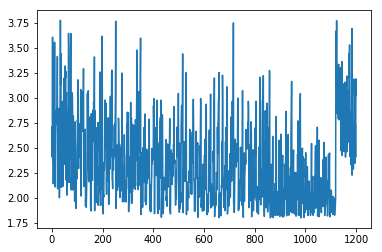

In [20]:
plt.plot(meta_data['z'])

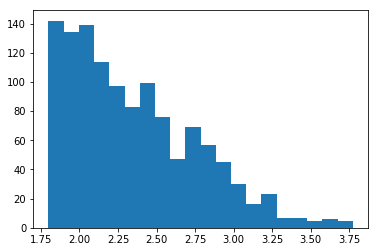

In [21]:
_ = plt.hist(meta_data['z'], bins=20)

In [22]:
# solamente lineas  de vision con z> 2.5, recorto las longitudes de onda en el rango donde se que siempre
# habra senal.
min_z_qso = 2.5
max_lambda = 1216*(min_z_qso+1)
print(max_lambda)
ii_max_lambda = np.count_nonzero(wave<max_lambda)

ii_qso = meta_data['z']>min_z_qso
ii_qso
transmission_data = tmp_transmission_data[ii_qso,:ii_max_lambda]
n_spectra = len(transmission_data)
n_lambda = np.shape(transmission_data)[1]
print(n_spectra, n_lambda)
print(np.shape(transmission_data))

4256.0
378 3530
(378, 3530)


In [23]:
transmission_data

array([[  1.90156057e-01,   2.46815950e-01,   3.74426961e-01, ...,
          9.89668548e-01,   9.94835615e-01,   9.96253788e-01],
       [  4.98033464e-01,   6.59303546e-01,   8.62863660e-01, ...,
          9.84241128e-01,   9.79853928e-01,   9.77910161e-01],
       [  9.39155400e-01,   9.69025671e-01,   9.83782589e-01, ...,
          9.95463312e-01,   9.86163616e-01,   9.73882377e-01],
       ..., 
       [  9.99983847e-01,   9.99969721e-01,   9.99931395e-01, ...,
          4.26355392e-01,   7.38257825e-01,   9.11146998e-01],
       [  3.03116083e-01,   1.14636789e-13,   1.20247296e-14, ...,
          9.90530789e-01,   9.71705317e-01,   9.27750587e-01],
       [  9.98796761e-01,   9.97998238e-01,   9.97600853e-01, ...,
          9.70281184e-01,   9.59122598e-01,   9.24734831e-01]], dtype=float32)

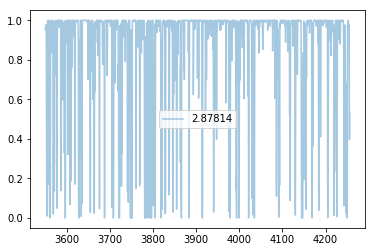

In [24]:
id_d = 20
lya = 1216.0*(meta_data['z'][id_d] + 1)
plt.plot(wave[:ii_max_lambda], transmission_data[id_d,:], label=meta_data['z'][id_d], alpha=0.4)
#plt.vlines(lya, 0, 1.0, color='red')

plt.legend()

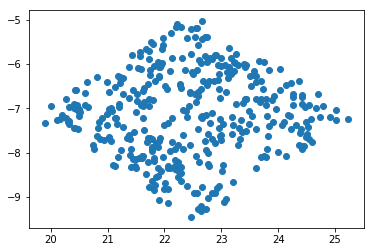

In [25]:
plt.scatter(meta_data['RA'][ii_qso], meta_data['DEC'][ii_qso])

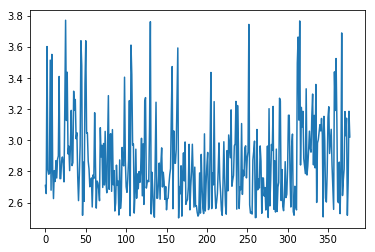

In [26]:
plt.plot(meta_data['z'][ii_qso])

In [27]:
id_list = np.arange(n_spectra)
id_training = id_list[(id_list%2)==0]
id_test = id_list[(id_list%2)==1]

In [28]:
len(id_training), len(id_test)

(189, 189)

In [29]:
np.random.seed(seed=42)
for id_t in id_training:
    filename = '../data/training_id_{}.txt'.format(id_t)
    np.savetxt(filename, transmission_data[id_t,:].T)
    
for id_t in id_test:
    filename = '../data/truth_id_{}.txt'.format(id_t)
    np.savetxt(filename, transmission_data[id_t,:].T)
    
    filename = '../data/test_id_{}.txt'.format(id_t)
    r = np.random.random(n_lambda)
    tmp_trans = transmission_data[id_t,:].copy()
    tmp_trans[r<0.75]=-1.0
    np.savetxt(filename, tmp_trans)


(1800, 2300)

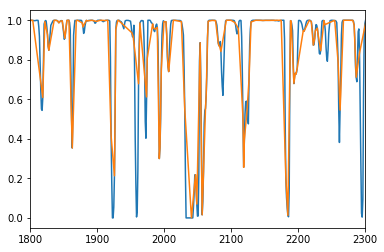

In [30]:
id_t = 31
truth_filename = '../data/truth_id_{}.txt'.format(id_t)
test_filename = '../data/test_id_{}.txt'.format(id_t)
truth_data = np.loadtxt(truth_filename)
test_data = np.loadtxt(test_filename)
x = np.arange(len(truth_data))
plt.plot(x, truth_data)
plt.plot(x[test_data>0], test_data[test_data>0])
plt.xlim([1800,2300])

In [81]:
def write_test_train_subpixel(pix_num=11, subpix_id=0, global_id=0, global_h5f=None):
    np.random.seed(seed=42)

    lya_mock_path = "/project/projectdirs/desi/mocks/lya_forest/develop/london/v6.0/v6.0.0"
    sub_pix = pix_num*100 + subpix_id
    data_path = os.path.join(lya_mock_path, str(pix_num), str(sub_pix))
    print(data_path)
    filename = "transmission-16-{}.fits".format(sub_pix)
    mock_filename = os.path.join(data_path, filename)
    print(mock_filename)
    
    hdul = fits.open(mock_filename)
    tmp_transmission_data = hdul[3].data
    wave = hdul[2].data
    meta_data = hdul[1].data
    n_spectra = len(tmp_transmission_data)
    n_lambda = np.shape(tmp_transmission_data)[1]
    print(n_spectra, n_lambda)
    print(np.shape(tmp_transmission_data))
    hdul.close()
    
    # solamente lineas  de vision con z> 2.5, recorto las longitudes de onda en el rango donde se que siempre
    # habra senal.
    min_z_qso = 2.5
    max_lambda = 1216*(min_z_qso+1)
    print(max_lambda)
    ii_max_lambda = np.count_nonzero(wave<max_lambda)

    ii_qso = meta_data['z']>min_z_qso
    transmission_data = tmp_transmission_data[ii_qso,:ii_max_lambda]
    n_spectra = len(transmission_data)
    n_lambda = np.shape(transmission_data)[1]
    print(n_spectra, n_lambda)
    print(np.shape(transmission_data))
    
    id_list = np.arange(n_spectra)
    id_training = id_list[(id_list%2)==0]
    id_test = id_list[(id_list%2)==1]
    
    
    for id_t in id_training:
        #filename = '../data/training_id_{:05d}.hdf5'.format(global_id)
        #h5f = h5py.File(filename, 'w')
        #h5f.create_dataset("transmission", data=transmission_data[id_t,:])
        global_h5f.create_dataset("transmission_{:05d}".format(global_id), data=transmission_data[id_t,:])
        global_id = global_id + 1
        #h5f.close()
    for id_t in id_test:
        filename = '../data/truth_id_{:05d}.hdf5'.format(global_id)
       # h5f = h5py.File(filename, 'w')
        #h5f.create_dataset('transmission', data=transmission_data[id_t,:])
        #h5f.close()

    
        filename = '../data/test_id_{:05d}.hdf5'.format(global_id)
        r = np.random.random(n_lambda)
        tmp_trans = transmission_data[id_t,:].copy()
        tmp_trans[r<0.75]=-1.0
        #h5f = h5py.File(filename, 'w')
        #h5f.create_dataset('transmission', data=tmp_trans)
        #h5f.close()
        global_id = global_id + 1
    return global_id


In [82]:
global_id = 0
for i in range(60):
    filename = '../data/training_{:02d}.hdf5'.format(i)
    global_h5f = h5py.File(filename, 'w')
    global_id = write_test_train_subpixel(pix_num=11, subpix_id=i, global_id=global_id, global_h5f=global_h5f)
    global_h5f.close()

/project/projectdirs/desi/mocks/lya_forest/develop/london/v6.0/v6.0.0/11/1100
/project/projectdirs/desi/mocks/lya_forest/develop/london/v6.0/v6.0.0/11/1100/transmission-16-1100.fits
1201 14750
(1201, 14750)
4256.0
378 3530
(378, 3530)
/project/projectdirs/desi/mocks/lya_forest/develop/london/v6.0/v6.0.0/11/1101
/project/projectdirs/desi/mocks/lya_forest/develop/london/v6.0/v6.0.0/11/1101/transmission-16-1101.fits
1256 14750
(1256, 14750)
4256.0
357 3530
(357, 3530)
/project/projectdirs/desi/mocks/lya_forest/develop/london/v6.0/v6.0.0/11/1102
/project/projectdirs/desi/mocks/lya_forest/develop/london/v6.0/v6.0.0/11/1102/transmission-16-1102.fits
1159 14750
(1159, 14750)
4256.0
349 3530
(349, 3530)
/project/projectdirs/desi/mocks/lya_forest/develop/london/v6.0/v6.0.0/11/1103
/project/projectdirs/desi/mocks/lya_forest/develop/london/v6.0/v6.0.0/11/1103/transmission-16-1103.fits
1219 14750
(1219, 14750)
4256.0
331 3530
(331, 3530)
/project/projectdirs/desi/mocks/lya_forest/develop/london/v6

359 3530
(359, 3530)
/project/projectdirs/desi/mocks/lya_forest/develop/london/v6.0/v6.0.0/11/1136
/project/projectdirs/desi/mocks/lya_forest/develop/london/v6.0/v6.0.0/11/1136/transmission-16-1136.fits
1168 14750
(1168, 14750)
4256.0
361 3530
(361, 3530)
/project/projectdirs/desi/mocks/lya_forest/develop/london/v6.0/v6.0.0/11/1137
/project/projectdirs/desi/mocks/lya_forest/develop/london/v6.0/v6.0.0/11/1137/transmission-16-1137.fits
1239 14750
(1239, 14750)
4256.0
393 3530
(393, 3530)
/project/projectdirs/desi/mocks/lya_forest/develop/london/v6.0/v6.0.0/11/1138
/project/projectdirs/desi/mocks/lya_forest/develop/london/v6.0/v6.0.0/11/1138/transmission-16-1138.fits
1223 14750
(1223, 14750)
4256.0
360 3530
(360, 3530)
/project/projectdirs/desi/mocks/lya_forest/develop/london/v6.0/v6.0.0/11/1139
/project/projectdirs/desi/mocks/lya_forest/develop/london/v6.0/v6.0.0/11/1139/transmission-16-1139.fits
1248 14750
(1248, 14750)
4256.0
403 3530
(403, 3530)
/project/projectdirs/desi/mocks/lya_for

In [86]:
f = h5py.File('../data/training_10.hdf5', 'r')
print(list(f.keys()))
lista_transmision = list(f.keys())
data = f[lista_transmision[0]][...]
f.close()

['transmission_03461', 'transmission_03462', 'transmission_03463', 'transmission_03464', 'transmission_03465', 'transmission_03466', 'transmission_03467', 'transmission_03468', 'transmission_03469', 'transmission_03470', 'transmission_03471', 'transmission_03472', 'transmission_03473', 'transmission_03474', 'transmission_03475', 'transmission_03476', 'transmission_03477', 'transmission_03478', 'transmission_03479', 'transmission_03480', 'transmission_03481', 'transmission_03482', 'transmission_03483', 'transmission_03484', 'transmission_03485', 'transmission_03486', 'transmission_03487', 'transmission_03488', 'transmission_03489', 'transmission_03490', 'transmission_03491', 'transmission_03492', 'transmission_03493', 'transmission_03494', 'transmission_03495', 'transmission_03496', 'transmission_03497', 'transmission_03498', 'transmission_03499', 'transmission_03500', 'transmission_03501', 'transmission_03502', 'transmission_03503', 'transmission_03504', 'transmission_03505', 'transmis

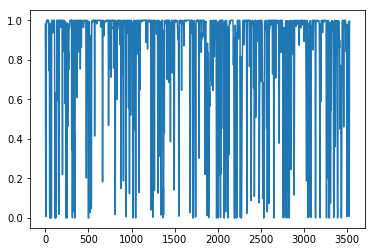

In [87]:
plt.plot(data)